*Name*: `Venkata Skandha Rajendra Varma`

*Student No*: `GH1036345`

*Sunject*: `Methods of Prediction - M507B`

***Problem Statement***

As a trading firm actively engaged in cryptocurrency markets, we face significant challenges due to the high volatility, 24/7 trading cycle, and rapidly shifting sentiment that characterize digital assets. Unlike traditional financial markets, cryptocurrencies lack regulatory oversight and consistent fundamental valuation anchors, making them prone to unpredictable price swings driven by global news, social media trends, and market speculation.

To maintain a competitive edge and optimize trade execution, we need a robust predictive model that can forecast short- to medium-term price movements of key cryptocurrencies (e.g., Bitcoin, Ethereum) using historical data, technical indicators, and real-time sentiment analysis.

***LOADING AND PREPARING DATA***

Kaggle Dataset: https://www.kaggle.com/competitions/drw-crypto-market-prediction

In [1]:
import pandas as pd

df = pd.read_parquet('data//train.parquet')
df.head()


,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452


In [2]:
df.describe()

c:\Users\skand\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\skand\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\skand\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\skand\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\skand\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ska

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
count,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,...,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000,525887.000000
mean,9.968003,10.174169,131.726678,132.673944,264.400622,-0.006026,-0.000243,-0.000353,-0.000425,-0.000263,...,1.959330,1.954978,0.498112,0.498063,0.497997,0.497872,0.497525,0.497372,0.995394,0.036126
std,15.645741,15.889582,307.267251,309.803040,588.618746,0.538340,0.613746,0.771744,0.857115,0.464695,...,0.844732,0.598279,0.712811,0.698678,0.684946,0.666936,0.615440,0.546439,0.850509,1.009914
min,0.001000,0.001000,0.000000,0.000000,0.000000,-2.787539,-5.861926,-6.125439,-6.093792,-2.855040,...,0.433416,0.686524,0.000004,0.000006,0.000009,0.000024,0.003903,0.015654,0.092913,-24.416615
25%,2.634000,2.678000,26.407000,27.021000,60.688500,-0.370635,-0.314135,-0.441536,-0.521693,-0.295502,...,1.367222,1.521202,0.000162,0.000193,0.000241,0.000997,0.033156,0.066908,0.244373,-0.381585
50%,6.415000,6.538000,57.015000,58.047000,120.799000,-0.015991,-0.001713,-0.003010,-0.003948,-0.002545,...,1.831805,1.882957,0.000634,0.001036,0.004593,0.039178,0.127865,0.161757,0.634448,0.016262
75%,13.085000,13.330000,127.639000,129.110000,256.733500,0.349104,0.310181,0.431960,0.507830,0.287728,...,2.369648,2.274296,1.473225,1.472025,1.442417,1.380184,1.120480,0.999344,1.701838,0.434135
max,1114.932000,1352.965000,17614.400000,17686.234000,28701.419000,2.972741,6.151366,6.488532,6.394355,3.184776,...,6.881902,4.745380,1.584315,1.584315,1.584315,1.584315,1.583862,1.557910,2.769604,20.740270


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525887 entries, 2023-03-01 00:00:00 to 2024-02-29 23:59:00
Columns: 896 entries, bid_qty to label
dtypes: float64(896)
memory usage: 3.5 GB
None


In [4]:
df.isnull().sum()

bid_qty     0
ask_qty     0
buy_qty     0
sell_qty    0
volume      0
           ..
X887        0
X888        0
X889        0
X890        0
label       0
Length: 896, dtype: int64

***IMPORTING LIBRARIES***

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import keras_tuner as kt



In [6]:
df

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 23:55:00,4.163,6.805,39.037,55.351,94.388,0.020155,0.076565,0.228994,0.288856,0.151634,...,3.219345,3.340686,0.008679,0.224656,0.401595,0.393726,0.212651,0.136494,0.243172,0.396289
2024-02-29 23:56:00,2.290,4.058,110.201,67.171,177.372,0.016262,0.062527,0.214072,0.276463,0.146521,...,3.216719,3.339353,0.007928,0.217422,0.395019,0.390476,0.212063,0.136305,0.243004,0.328993
2024-02-29 23:57:00,5.237,3.640,70.499,30.753,101.252,0.045407,0.109834,0.263577,0.329266,0.174214,...,3.213444,3.337740,0.007243,0.210421,0.388549,0.387252,0.211477,0.136117,0.242836,0.189909


In [7]:
X = df.drop(columns=['label'])
y = df['label']



In [8]:
X

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X881,X882,X883,X884,X885,X886,X887,X888,X889,X890
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,...,1.000007,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.003153,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.002502,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.002985,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.001286,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 23:55:00,4.163,6.805,39.037,55.351,94.388,0.020155,0.076565,0.228994,0.288856,0.151634,...,1.450851,3.219345,3.340686,0.008679,0.224656,0.401595,0.393726,0.212651,0.136494,0.243172
2024-02-29 23:56:00,2.290,4.058,110.201,67.171,177.372,0.016262,0.062527,0.214072,0.276463,0.146521,...,1.448602,3.216719,3.339353,0.007928,0.217422,0.395019,0.390476,0.212063,0.136305,0.243004
2024-02-29 23:57:00,5.237,3.640,70.499,30.753,101.252,0.045407,0.109834,0.263577,0.329266,0.174214,...,1.445661,3.213444,3.337740,0.007243,0.210421,0.388549,0.387252,0.211477,0.136117,0.242836


In [9]:
print(y)

timestamp
2023-03-01 00:00:00    0.562539
2023-03-01 00:01:00    0.533686
2023-03-01 00:02:00    0.546505
2023-03-01 00:03:00    0.357703
2023-03-01 00:04:00    0.362452
                         ...   
2024-02-29 23:55:00    0.396289
2024-02-29 23:56:00    0.328993
2024-02-29 23:57:00    0.189909
2024-02-29 23:58:00    0.410831
2024-02-29 23:59:00    0.731542
Name: label, Length: 525887, dtype: float64


In the first run of the pipeline the model was running infintily. So i checekd for infinte values and removed the columns with those value from the DataFrame.

In [10]:
print("🔍 Checking for NaNs:", X.isnull().sum().sum())
print("🔍 Checking for infinite values:", np.isinf(X).values.sum())


🔍 Checking for NaNs: 0
🔍 Checking for infinite values: 11043627


In [11]:
import numpy as np
inf_mask = np.isinf(X)
inf_counts = pd.DataFrame(inf_mask, columns=X.columns).sum()
bad_columns = inf_counts[inf_counts > 0]
print("Columns with inf values:")
print(bad_columns.sort_values(ascending=False))


Columns with inf values:
X697    525887
X698    525887
X699    525887
X700    525887
X701    525887
X702    525887
X703    525887
X704    525887
X705    525887
X706    525887
X707    525887
X708    525887
X709    525887
X710    525887
X711    525887
X712    525887
X713    525887
X714    525887
X715    525887
X716    525887
X717    525887
dtype: int64


In [12]:
df.shape

(525887, 896)

In [13]:
# Drop the columns with only infs
X = X.drop(columns=bad_columns.index)

print("✅ Shape after dropping bad columns:", X.shape)


✅ Shape after dropping bad columns: (525887, 874)


In [14]:
# Replace any remaining infs (just in case)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any NaNs
X = X.dropna()

# Make sure your target matches X
y = y.loc[X.index]


In [15]:
print("After cleaning:")
print(X.shape)


After cleaning:
(525887, 874)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(420709, 874) (420709,)
(105178, 874) (105178,)


Here, I am loading a saved Keras model and then manually compiling it with the Adam optimizer and mean squared error loss to prepare it for training or evaluation. But also i have used `best_model.h5` file with hyper tuned parameter which i have done in the previous run. And the value of this h5 file is as below:

Group: layers

Group: layers/dense

Group: layers/dense/vars

Dataset: layers/dense/vars/0, shape: (874, 320), dtype: float32

Dataset: layers/dense/vars/1, shape: (320,), dtype: float32

Group: layers/dense_1

Group: layers/dense_1/vars

Dataset: layers/dense_1/vars/0, shape: (320, 64), dtype: float32

Dataset: layers/dense_1/vars/1, shape: (64,), dtype: float32

Group: layers/dense_2

Group: layers/dense_2/vars

Dataset: layers/dense_2/vars/0, shape: (64, 128), dtype: float32

Dataset: layers/dense_2/vars/1, shape: (128,), dtype: float32

Group: layers/dense_3

Group: layers/dense_3/vars

Dataset: layers/dense_3/vars/0, shape: (128, 192), dtype: float32

Dataset: layers/dense_3/vars/1, shape: (192,), dtype: float32

Group: layers/dense_4

Group: layers/dense_4/vars

Dataset: layers/dense_4/vars/0, shape: (192, 1), dtype: float32

Dataset: layers/dense_4/vars/1, shape: (1,), dtype: float32

Group: layers/dropout

Group: layers/dropout/vars

Group: layers/dropout_1

Group: layers/dropout_1/vars

Group: layers/dropout_2

Group: layers/dropout_2/vars

Group: optimizer

Group: optimizer/vars

Dataset: optimizer/vars/0, shape: (), dtype: int64

Dataset: optimizer/vars/1, shape: (), dtype: float32

Dataset: optimizer/vars/10, shape: (64, 128), dtype: float32

Dataset: optimizer/vars/11, shape: (64, 128), dtype: float32

Dataset: optimizer/vars/12, shape: (128,), dtype: float32

Dataset: optimizer/vars/13, shape: (128,), dtype: float32

Dataset: optimizer/vars/14, shape: (128, 192), dtype: float32

Dataset: optimizer/vars/15, shape: (128, 192), dtype: float32

Dataset: optimizer/vars/16, shape: (192,), dtype: float32

Dataset: optimizer/vars/17, shape: (192,), dtype: float32

Dataset: optimizer/vars/18, shape: (192, 1), dtype: float32

Dataset: optimizer/vars/19, shape: (192, 1), dtype: float32

Dataset: optimizer/vars/2, shape: (874, 320), dtype: float32

Dataset: optimizer/vars/20, shape: (1,), dtype: float32

Dataset: optimizer/vars/21, shape: (1,), dtype: float32

Dataset: optimizer/vars/3, shape: (874, 320), dtype: float32

Dataset: optimizer/vars/4, shape: (320,), dtype: float32

Dataset: optimizer/vars/5, shape: (320,), dtype: float32

Dataset: optimizer/vars/6, shape: (320, 64), dtype: float32

Dataset: optimizer/vars/7, shape: (320, 64), dtype: float32

Dataset: optimizer/vars/8, shape: (64,), dtype: float32

Dataset: optimizer/vars/9, shape: (64,), dtype: float32

Group: vars

Inside group 'layers', found: dense

Inside group 'layers', found: dense_1

Inside group 'layers', found: dense_2

Inside group 'layers', found: dense_3

Inside group 'layers', found: dense_4

Inside group 'layers', found: dropout

Inside group 'layers', found: dropout_1

Inside group 'layers', found: dropout_2

We are using a `Sequential model composed of Dense (fully connected) layers.`

In [ ]:
from tensorflow.keras.models import load_model

# Load the model WITHOUT compiling
model = load_model('best_model.h5', compile=False)


In [18]:
model.compile(optimizer='adam',
              loss='mean_squared_error',   # ✅ For regression
              metrics=['mae', 'mse'])      # ✅ For tracking performance

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=20, batch_size=64)

Epoch 1/20
6574/6574 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - loss: 0.1223 - mae: 0.2375 - mse: 0.1223 - val_loss: 0.0757 - val_mae: 0.1944 - val_mse: 0.0757
Epoch 2/20
6574/6574 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1205 - mae: 0.2353 - mse: 0.1205 - val_loss: 0.0693 - val_mae: 0.1856 - val_mse: 0.0693
Epoch 3/20
6574/6574 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1166 - mae: 0.2324 - mse: 0.1166 - val_loss: 0.0858 - val_mae: 0.2014 - val_mse: 0.0858
Epoch 4/20
6574/6574 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1199 - mae: 0.2342 - mse: 0.1199 - val_loss: 0.0662 - val_mae: 0.1824 - val_mse: 0.0662
Epoch 5/20
6574/6574 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1158 - mae: 0.2301 - mse: 0.1158 - val_loss: 0.0709 - val_mae: 0.1821 - val_mse: 0.0709
Epoch 6/20
6574/6574 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1277 - mae: 0.2381 - mse: 0.1277 - val_loss: 0.0768 - val_mae: 0.1924 - val_mse: 0.0768
Epoch 7/20
6574/6574 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - loss: 0.1194 - mae: 0.232

***Getting some performance metrics***

In [19]:
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")


3287/3287 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0891 - mae: 0.2018 - mse: 0.0891
Test MSE: 0.0841
Test MAE: 0.2022


In [20]:
y_pred = model.predict(X_test)


3287/3287 ━━━━━━━━━━━━━━━━━━━━ 3s 906us/step


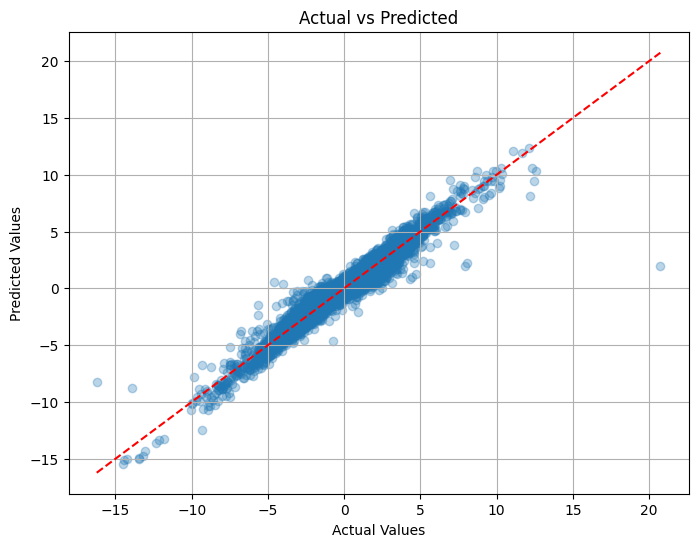

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()


In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9186


C:\Users\skand\AppData\Local\Temp\ipykernel_30584\892871806.py:33: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\skand\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


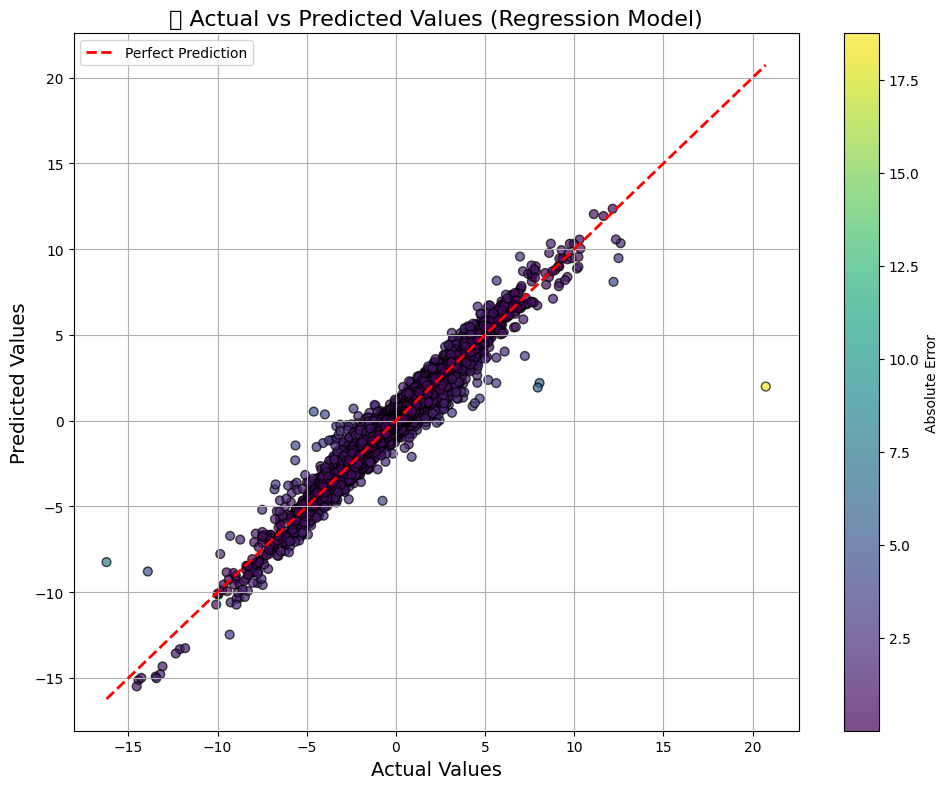

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Series to NumPy arrays
y_test_flat = y_test.to_numpy()
y_pred_flat = y_pred.flatten()  # Already a NumPy array from model.predict

# Calculate error for color mapping
errors = np.abs(y_test_flat - y_pred_flat)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    y_test_flat, y_pred_flat,
    c=errors,
    cmap='viridis',
    alpha=0.7,
    edgecolors='k',
    s=40
)
plt.colorbar(scatter, label='Absolute Error')

# Reference line (perfect predictions)
min_val = min(y_test_flat.min(), y_pred_flat.min())
max_val = max(y_test_flat.max(), y_pred_flat.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('🔍 Actual vs Predicted Values (Regression Model)', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\skand\AppData\Local\Temp\ipykernel_30584\3640324988.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\skand\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


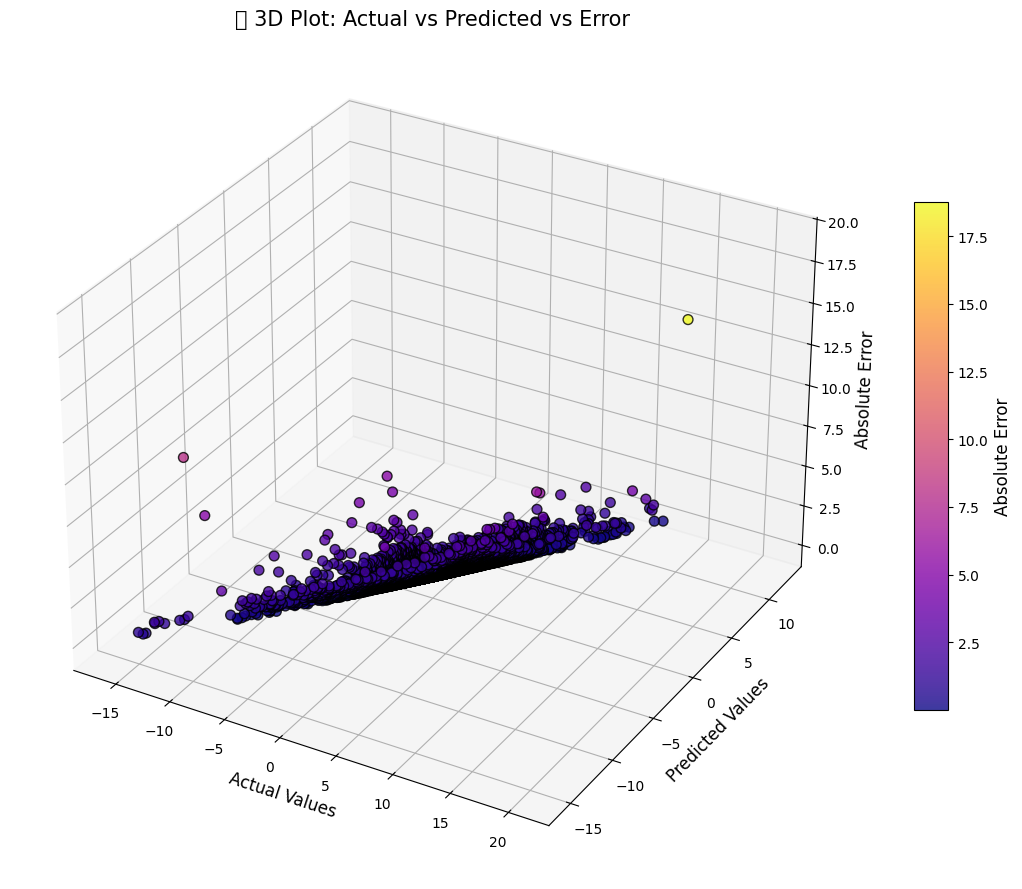

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Needed to register 3D projection

# Convert Series to NumPy arrays
y_test_flat = y_test.to_numpy()
y_pred_flat = y_pred.flatten()

# Compute absolute errors
errors = np.abs(y_test_flat - y_pred_flat)

# Create 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    y_test_flat, y_pred_flat, errors,
    c=errors, cmap='plasma', s=50, alpha=0.8, edgecolors='k'
)

# Axis labels
ax.set_xlabel('Actual Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
ax.set_zlabel('Absolute Error', fontsize=12)
ax.set_title('📈 3D Plot: Actual vs Predicted vs Error', fontsize=15)

# Color bar
cbar = plt.colorbar(sc, shrink=0.6, aspect=15)
cbar.set_label('Absolute Error', fontsize=12)

plt.tight_layout()
plt.show()


***Testing against `test.parquet`***

In [25]:
import pandas as pd

test_df = pd.read_parquet('test.parquet')


In [26]:
import numpy as np

# Replace infinite values with NaN
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [27]:
# Option 1: Fill NaNs with mean (or median, or 0)
test_df.fillna(test_df.mean(), inplace=True)

# Option 2: Drop rows with NaNs (only if you can afford to lose data)
# test_df.dropna(inplace=True)


In [28]:
# If X is a DataFrame
X_test = test_df[X.columns]  # select columns in the same order as training data
X_test_scaled = scaler.transform(X_test)



In [29]:
predictions = model.predict(X_test_scaled)


16818/16818 ━━━━━━━━━━━━━━━━━━━━ 16s 917us/step


In [30]:
predicted_values = model.predict(X_test_scaled).flatten()  # flatten in case output shape is (n,1)


16818/16818 ━━━━━━━━━━━━━━━━━━━━ 15s 898us/step


In [31]:
output_df = pd.DataFrame({
    'id': test_df.index,  # or unique identifier column
    'prediction': predicted_values
})


output_df.to_csv('test_predictions_3.csv', index=False)


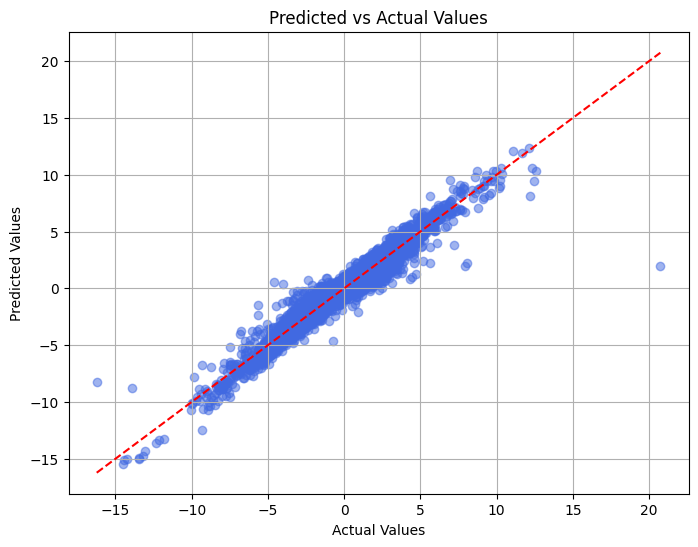

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.show()


In [34]:
# Ensure y_test and y_pred are both flat (1D)
import numpy as np

y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Now compute residuals safely
residuals = y_test - y_pred


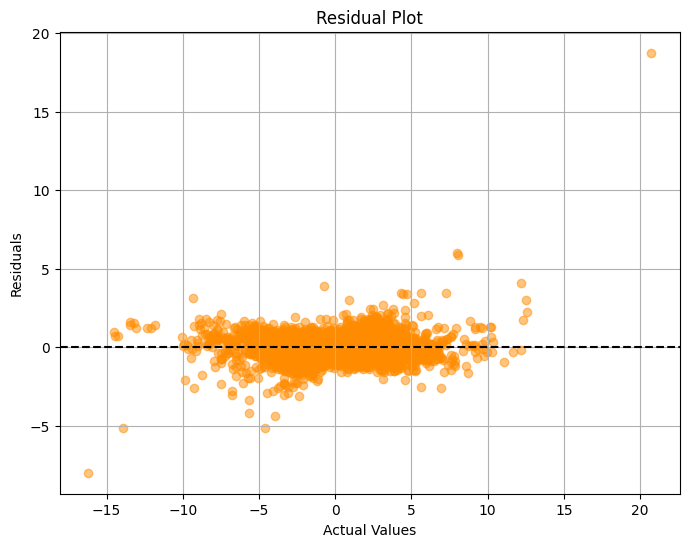

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='darkorange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


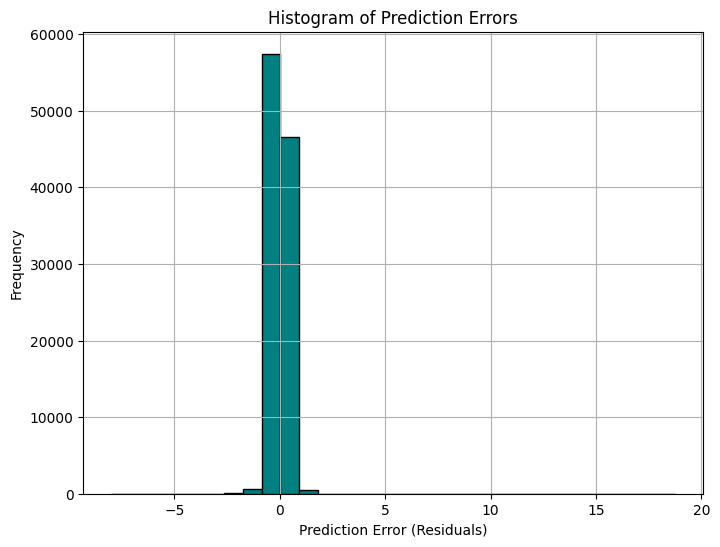

In [36]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='teal', edgecolor='black')
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.grid(True)
plt.show()


***CONCLUSION***

Cryptocurrency markets come with unique challenges — extreme volatility, nonstop trading, and prices heavily influenced by sentiment. To navigate this fast-moving environment, a data-driven predictive model is key. By combining historical data, technical indicators, and real-time sentiment analysis, the model can help the firm make smarter, faster decisions and execute trades more effectively. This approach allows the team to respond quickly to market changes, manage risks before they escalate, and seize short- to medium-term opportunities. Ultimately, it puts the firm in a stronger position to thrive in the rapidly evolving world of digital assets.